In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dt = sns.load_dataset('tips')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [2]:
dt.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [3]:
dt.value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
3.07        1.00   Female  Yes     Sat   Dinner  1       1
22.23       5.00   Male    No      Sun   Dinner  2       1
20.69       2.45   Female  No      Sat   Dinner  4       1
            5.00   Male    No      Sun   Dinner  5       1
                                                        ..
15.53       3.00   Male    Yes     Sat   Dinner  2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
            3.00   Male    Yes     Sat   Dinner  3       1
15.77       2.23   Female  No      Sat   Dinner  2       1
50.81       10.00  Male    Yes     Sat   Dinner  3       1
Length: 243, dtype: int64

In [4]:
dt['sex']=dt['sex'].map({'Male':1, 'Female':2})
dt['smoker']=dt['smoker'].map({'No':0, 'Yes':1})
dt.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,2,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,2,0,Sun,Dinner,4


In [5]:
dt.sort_values('tip', ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,1,1,Sat,Dinner,3
212,48.33,9.00,1,0,Sat,Dinner,4
23,39.42,7.58,1,0,Sat,Dinner,4
59,48.27,6.73,1,0,Sat,Dinner,4
141,34.30,6.70,1,0,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,2,0,Sun,Dinner,2
236,12.60,1.00,1,1,Sat,Dinner,2
111,7.25,1.00,2,0,Sat,Dinner,1
67,3.07,1.00,2,1,Sat,Dinner,1


In [6]:
dt['sex']=dt['sex'].astype('int64')
dt['smoker']=dt['smoker'].astype('int64')
dt.dtypes

total_bill     float64
tip            float64
sex              int64
smoker           int64
day           category
time          category
size             int64
dtype: object

In [8]:
htdata = dt['tip']>=5.00
dt[htdata].head()

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,2,0,Sun,Dinner,4
23,39.42,7.58,1,0,Sat,Dinner,4
39,31.27,5.00,1,0,Sat,Dinner,3
44,30.40,5.60,1,0,Sun,Dinner,4
46,22.23,5.00,1,0,Sun,Dinner,2


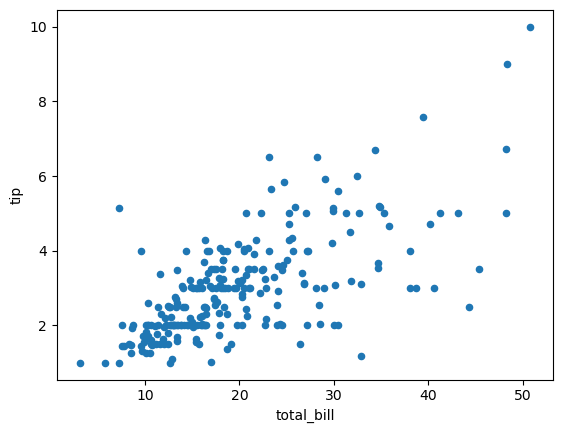

In [9]:
dt.plot(x='total_bill', y='tip', kind='scatter')
plt.show()

<Axes: xlabel='tip', ylabel='count'>

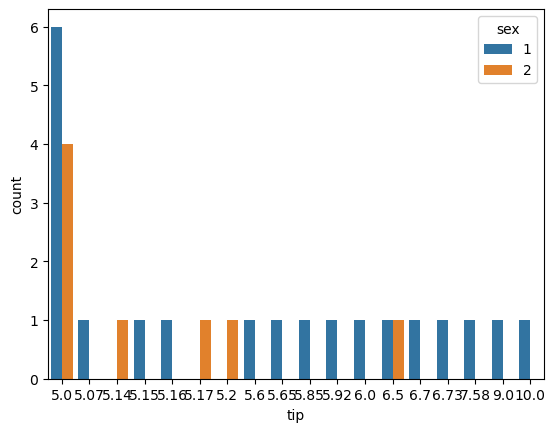

In [11]:
sns.countplot(x='tip', hue='sex', data=dt[htdata])

<Axes: xlabel='tip', ylabel='count'>

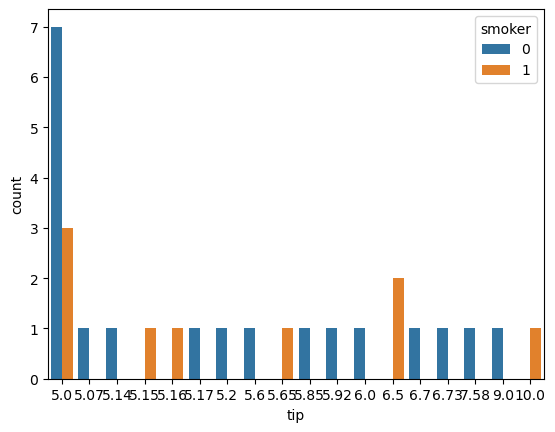

In [12]:
sns.countplot(x='tip', hue='smoker', data=dt[htdata])

<Axes: xlabel='tip', ylabel='count'>

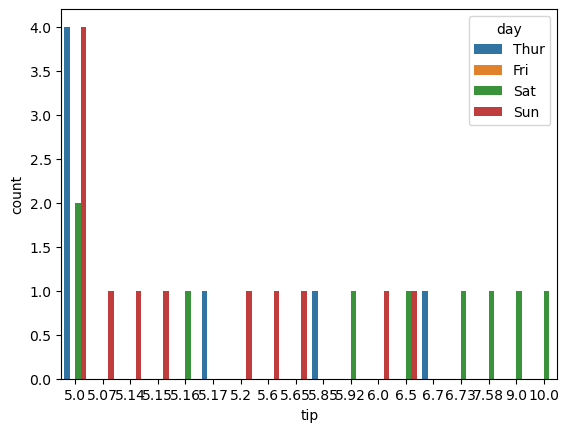

In [13]:
sns.countplot(x='tip', hue='day', data=dt[htdata])

<Axes: xlabel='tip', ylabel='count'>

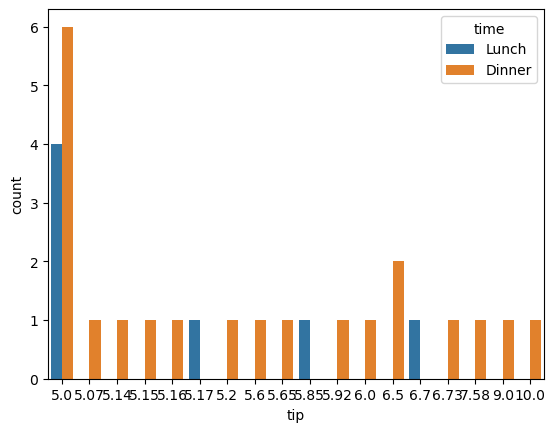

In [14]:
sns.countplot(x='tip', hue='time', data=dt[htdata])

<Axes: xlabel='tip', ylabel='count'>

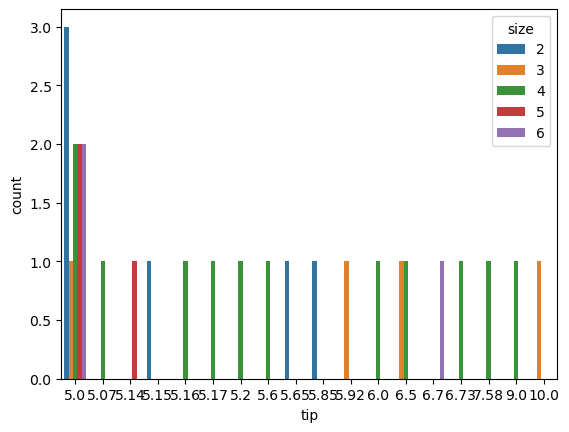

In [15]:
sns.countplot(x='tip', hue='size', data=dt[htdata])

In [16]:
dt['day']=dt['day'].map({'Thur':1, 'Fri':1, 'Sat':2, 'Sun':2})
dt['day'].value_counts()

2    163
1     81
Name: day, dtype: int64

<Axes: xlabel='tip', ylabel='count'>

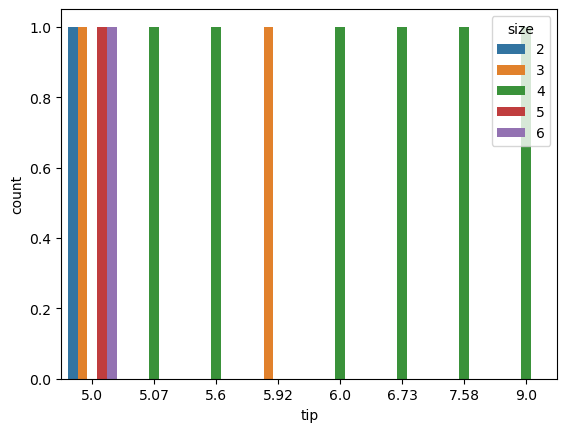

In [20]:
hitdata = dt.loc[dt.tip>=5.00, ['tip','sex', 'smoker', 'day', 'time', 'size']]
mdata = hitdata.loc[hitdata.sex==1, ['tip', 'smoker', 'day', 'time', 'size']]
nsdata = mdata.loc[mdata.smoker==0, ['tip', 'day', 'time', 'size']]
wkdata = nsdata.loc[nsdata.day==2, ['tip', 'time','size']]
tdata = wkdata.loc[wkdata.time=='Dinner', ['tip','size']]
sns.countplot(x='tip', hue='size', data=tdata)

<Axes: xlabel='tip', ylabel='count'>

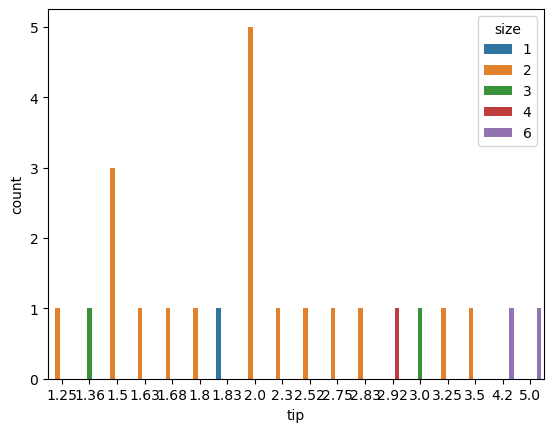

In [22]:
lotdata = dt.loc[dt.tip<=5.00, ['tip','sex', 'smoker', 'day', 'time', 'size']]
wdata = lotdata.loc[lotdata.sex==2, ['tip', 'smoker', 'day', 'time', 'size']]
ysdata = wdata.loc[wdata.smoker==0, ['tip', 'day', 'time', 'size']]
wddata = ysdata.loc[ysdata.day==1, ['tip', 'time','size']]
tidata = wddata.loc[wddata.time=='Lunch', ['tip','size']]
sns.countplot(x='tip', hue='size', data=tidata)